In [6]:
from keras.datasets import mnist, cifar10, imdb
from keras.layers.core import Activation, Dropout, Dense, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils.visualize_util import model_to_dot, plot

from IPython.display import SVG, display
from sklearn import datasets, preprocessing
import numpy as np

In [2]:
batch_size = 128
nb_classes = 10
nb_epoch = 12

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

In [3]:
#  the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

('X_train shape:', (60000, 1, 28, 28))
(60000, 'train samples')
(10000, 'test samples')


In [4]:
model = Sequential()
model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode="valid",
                        input_shape=(1, img_rows, img_cols)))
model.add(Activation("relu"))
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation("softmax"))

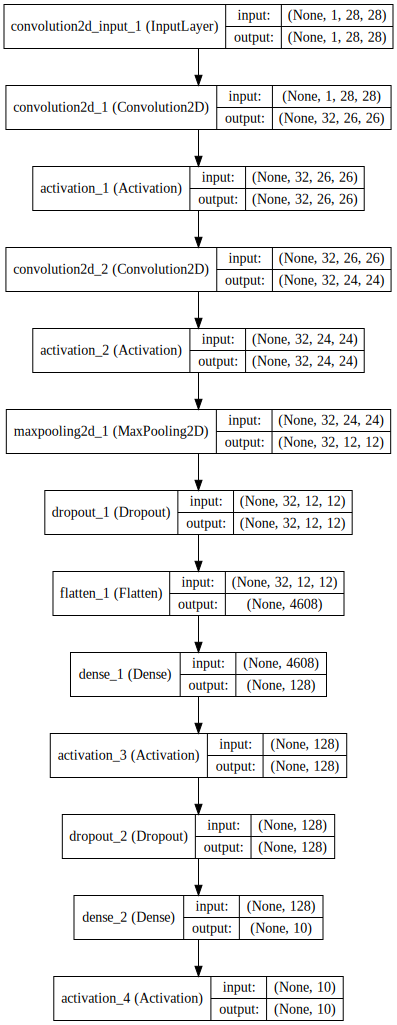

In [5]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [114]:
# モデルをコンパイル
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

In [115]:
model.fit(X_train, Y_train, nb_epoch=10, batch_size=100)

Epoch 1/10
60000/60000 [==============================] - 173s - loss: 0.2497 - acc: 0.9248   
Epoch 2/10
60000/60000 [==============================] - 158s - loss: 0.1570 - acc: 0.9543   
Epoch 3/10
60000/60000 [==============================] - 155s - loss: 0.1470 - acc: 0.9582   
Epoch 4/10
60000/60000 [==============================] - 155s - loss: 0.1468 - acc: 0.9585   
Epoch 5/10
60000/60000 [==============================] - 155s - loss: 0.1397 - acc: 0.9607   
Epoch 6/10
60000/60000 [==============================] - 156s - loss: 0.1381 - acc: 0.9611   
Epoch 7/10
60000/60000 [==============================] - 155s - loss: 0.1348 - acc: 0.9628   
Epoch 8/10
60000/60000 [==============================] - 156s - loss: 0.1259 - acc: 0.9651   
Epoch 9/10
60000/60000 [==============================] - 155s - loss: 0.1297 - acc: 0.9642   
Epoch 10/10
60000/60000 [==============================] - 157s - loss: 0.1358 - acc: 0.9633   


In [116]:
model.evaluate(X_test, Y_test, verbose=True)

10000/10000 [==============================] - 10s    


[0.054246928266129091, 0.98440000000000005]